В качестве анализа временных рядов, будем использовать данные на цену акций компании Apple за 5 лет

Сначала подключеам необходиые библиотеки для анализа даных

In [1]:
import pandas as pd # библиотека для работы с данными
import matplotlib.pyplot as plt # библиотека для построения графиков

Затем импортируем файл с исходными данными

In [2]:
ap = pd.read_csv('C://Users/1/Desktop/Jupyter/apple.csv')

Распечатаем исходное содержимое файла

In [3]:
print(ap)

            Date        Open        High         Low       Close     Volume  \
0     2017-02-22  136.429993  137.119995  136.110001  137.110001   20745300   
1     2017-02-21  136.229996  136.750000  135.979996  136.699997   24265100   
2     2017-02-17  135.100006  135.830002  135.100006  135.720001   22084500   
3     2017-02-16  135.669998  135.899994  134.839996  135.350006   22118000   
4     2017-02-15  135.520004  136.270004  134.619995  135.509995   35501600   
...          ...         ...         ...         ...         ...        ...   
1253  2012-02-29  541.560005  547.610023  535.700005  542.440025  238002800   
1254  2012-02-28  527.960014  535.410011  525.850006  535.410011  150096800   
1255  2012-02-27  521.309982  528.500000  516.280014  525.760017  136895500   
1256  2012-02-24  519.669998  522.899979  518.640015  522.409981  103768000   
1257  2012-02-23  515.079987  517.830009  509.499992  516.389977  142006900   

       Adj Close  
0     137.110001  
1     136.699

Как мы видем, таблица распечаталась не полностью, что может быть не удобно, хоть и есть информация о количестве строк и столбцов в ней. Это можно исправить с помощью функции ```pandas set_option```

In [4]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Выведем нашу таблицу еще раз


In [5]:
print(ap)

            Date        Open        High         Low       Close     Volume  \
0     2017-02-22  136.429993  137.119995  136.110001  137.110001   20745300   
1     2017-02-21  136.229996  136.750000  135.979996  136.699997   24265100   
2     2017-02-17  135.100006  135.830002  135.100006  135.720001   22084500   
3     2017-02-16  135.669998  135.899994  134.839996  135.350006   22118000   
4     2017-02-15  135.520004  136.270004  134.619995  135.509995   35501600   
5     2017-02-14  133.470001  135.089996  133.250000  135.020004   32815500   
6     2017-02-13  133.080002  133.820007  132.750000  133.289993   23035400   
7     2017-02-10  132.460007  132.940002  132.050003  132.119995   20065500   
8     2017-02-09  131.649994  132.449997  131.119995  132.419998   28349900   
9     2017-02-08  131.350006  132.220001  131.220001  132.039993   23004100   
10    2017-02-07  130.539993  132.089996  130.449997  131.529999   38183800   
11    2017-02-06  129.130005  130.500000  128.899994

Найдем максимальную и минимальную цену акции за весь период

In [6]:
print('Максимальная цена акции ',ap.High.max())
print('Минимальная цена акции ',ap.Low.min())

Максимальная цена акции  705.070023
Минимальная цена акции  89.470001


Теперь найдем максимальную положительную и отрицательную разницу между ценой во время открытия торгов и ценой во время закрытия торгов

In [7]:
len_apple = len(ap.index)
max_value =ap.Open[0]-ap.Close[0]
min_value = ap.Open[0]-ap.Close[0]
for i in range(len_apple):
    if(ap.Open[i]-ap.Close[i]>=max_value):
        max_value=ap.Open[i]-ap.Close[i]
    if(ap.Open[i]-ap.Close[i]<=min_value):
        min_value=ap.Open[i]-ap.Close[i]
print('Максимально положительная разница',max_value)
print('Максимально отрицательная разница',min_value)

Максимально положительная разница 30.119994999999903
Максимально отрицательная разница -30.760008999999968


Преобразуем наш индекс по дате и отсортируем список

In [8]:
ap = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
ap = ap.sort_index()

Посчитаем среднюю цену на открытии и закрытии торгов в 2015 году

In [9]:
print('Средняя цена открытия в 2015 году: ',ap.loc['2015', 'Open'].mean())
print('Средняя цена закрытия в 2015 году: ',ap.loc['2015', 'Close'].mean())

Средняя цена открытия в 2015 году:  120.17575393253965
Средняя цена закрытия в 2015 году:  120.03999980555547


Теперь построим график цены открытия за весь период

<AxesSubplot:xlabel='Date'>

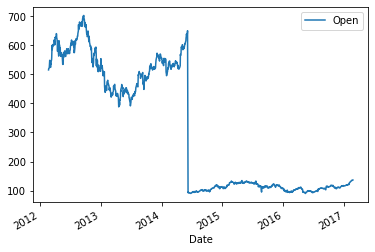

In [10]:
ap.loc['2012-Feb':'2017-Feb', ['Open']].plot()

По графику мы можем видеть, что в середине 2014 года произошел обвал цены на акции, но с чем же это связанно? Это результат "сплита" из-за которого каждая акция было превращена в 7 акций, а цена акции уменьшилась в 7 раз